# **▶ PART A - Data Preparartion**

In [61]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
sentiment = pd.read_csv('/content/drive/MyDrive/fear_greed_index.csv')
trades = pd.read_csv('/content/drive/MyDrive/historical_data.csv')


In [25]:
print("Sentiment Shape:", sentiment.shape)
print("Trades Shape:", trades.shape)

print("\nSentiment Info:")
print(sentiment.info())

print("\nTrades Info:")
print(trades.info())


Sentiment Shape: (2644, 4)
Trades Shape: (211224, 16)

Sentiment Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None

Trades Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  ob

In [26]:
print("\nSentiment Missing Values:")
print(sentiment.isnull().sum())

print("\nTrades Missing Values:")
print(trades.isnull().sum())



Sentiment Missing Values:
timestamp         0
value             0
classification    0
date              0
dtype: int64

Trades Missing Values:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64


In [27]:
print("\nSentiment Duplicates:", sentiment.duplicated().sum())
print("Trades Duplicates:", trades.duplicated().sum())



Sentiment Duplicates: 0
Trades Duplicates: 0


In [28]:
print(sentiment.columns)
print(trades.columns)


Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [29]:
sentiment.head()
trades.head()


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [30]:
sentiment['date'] = pd.to_datetime(sentiment['date'])


In [32]:
# ===============================
# STEP 1: Convert Sentiment Date
# ===============================

sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')
sentiment['date'] = sentiment['date'].dt.date


# ===============================
# STEP 2: Convert Trader Timestamp (DAY-FIRST FORMAT)
# ===============================

trades['Timestamp IST'] = pd.to_datetime(
    trades['Timestamp IST'],
    dayfirst=True,
    errors='coerce'
)

# Create daily date column
trades['date'] = trades['Timestamp IST'].dt.date


# ===============================
# STEP 3: Ensure Numeric Columns
# ===============================

trades['Closed PnL'] = pd.to_numeric(trades['Closed PnL'], errors='coerce')
trades['Size USD'] = pd.to_numeric(trades['Size USD'], errors='coerce')
trades['Fee'] = pd.to_numeric(trades['Fee'], errors='coerce')


# ===============================
# STEP 4: Merge Datasets
# ===============================

merged = trades.merge(
    sentiment[['date', 'classification', 'value']],
    on='date',
    how='left'
)


# ===============================
# STEP 5: Validate Merge
# ===============================

print("Merged Shape:", merged.shape)
print("Missing Sentiment Values:", merged['classification'].isnull().sum())

print("\nSample of merged data:")
print(merged.head())


Merged Shape: (211224, 19)
Missing Sentiment Values: 6

Sample of merged data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY 2024-12-02 22:50:00        0.000000       Buy   
1        16.00    127.68  BUY 2024-12-02 22:50:00      986.524596       Buy   
2       144.09   1150.63  BUY 2024-12-02 22:50:00     1002.518996       Buy   
3       142.98   1142.04  BUY 2024-12-02 22:50:00     1146.558564       Buy   
4         8.73     69.75  BUY 2024-12-02 22:50:00     1289.488521       Buy   

   Closed PnL

In [33]:
# Daily metrics per account
daily_metrics = merged.groupby(['date', 'Account', 'classification']).agg(
    daily_pnl=('Closed PnL', 'sum'),
    trade_count=('Closed PnL', 'count'),
    avg_trade_size=('Size USD', 'mean'),
    total_fees=('Fee', 'sum')
).reset_index()

print(daily_metrics.head())


         date                                     Account classification  \
0  2023-05-01  0x3998f134d6aaa2b6a5f723806d00fd2bbbbce891          Greed   
1  2023-12-05  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23  Extreme Greed   
2  2023-12-14  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23          Greed   
3  2023-12-15  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23          Greed   
4  2023-12-16  0xb1231a4a2dd02f2276fa3c5e2a2f3436e6bfed23          Greed   

    daily_pnl  trade_count  avg_trade_size  total_fees  
0    0.000000            3      159.000000    0.000000  
1    0.000000            9     5556.203333   12.501455  
2 -205.434737           11    10291.213636   28.300831  
3  -24.632034            2     5304.975000    2.652489  
4    0.000000            3     5116.256667    3.837189  


# ▶ **PART B - ANALYSIS**

In [34]:
#Overall Daily Performance by Sentiment

sentiment_analysis = daily_metrics.groupby('classification').agg(
    avg_daily_pnl=('daily_pnl', 'mean'),
    median_daily_pnl=('daily_pnl', 'median'),
    avg_trade_count=('trade_count', 'mean'),
    avg_trade_size=('avg_trade_size', 'mean'),
    avg_fees=('total_fees', 'mean')
).reset_index()

print(sentiment_analysis)


  classification  avg_daily_pnl  median_daily_pnl  avg_trade_count  \
0   Extreme Fear    4619.439053        218.377399       133.750000   
1  Extreme Greed    5161.922644        418.319862        76.030418   
2           Fear    5328.818161        107.892532        98.153968   
3          Greed    3318.100730        158.214922        77.628086   
4        Neutral    3438.618818        167.551743       100.228723   

   avg_trade_size    avg_fees  
0     6773.464125  149.303962  
1     5371.637182   51.389098  
2     8975.928546  146.757061  
3     6427.866594   97.374525  
4     6963.694861  104.718799  


In [35]:
#Win Rate Calculation

daily_metrics['win'] = daily_metrics['daily_pnl'] > 0

win_rate = daily_metrics.groupby('classification')['win'].mean().reset_index()

print(win_rate)


  classification       win
0   Extreme Fear  0.600000
1  Extreme Greed  0.682510
2           Fear  0.604762
3          Greed  0.611111
4        Neutral  0.622340


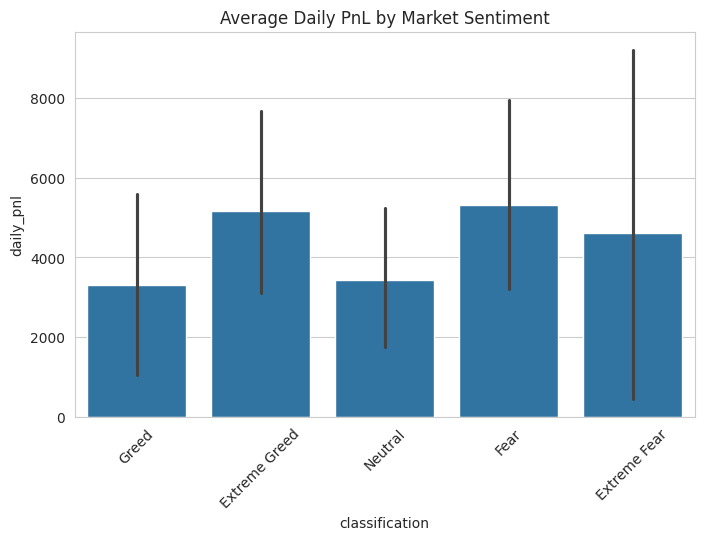

In [36]:
#Average Daily PnL by Sentiment

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(data=daily_metrics, x='classification', y='daily_pnl')
plt.title("Average Daily PnL by Market Sentiment")
plt.xticks(rotation=45)
plt.show()


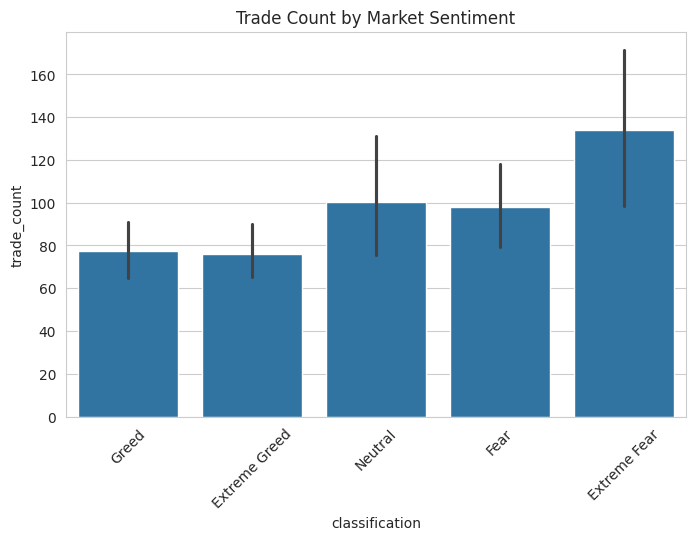

In [37]:
#Trade Frequency by Sentiment

plt.figure(figsize=(8,5))
sns.barplot(data=daily_metrics, x='classification', y='trade_count')
plt.title("Trade Count by Market Sentiment")
plt.xticks(rotation=45)
plt.show()


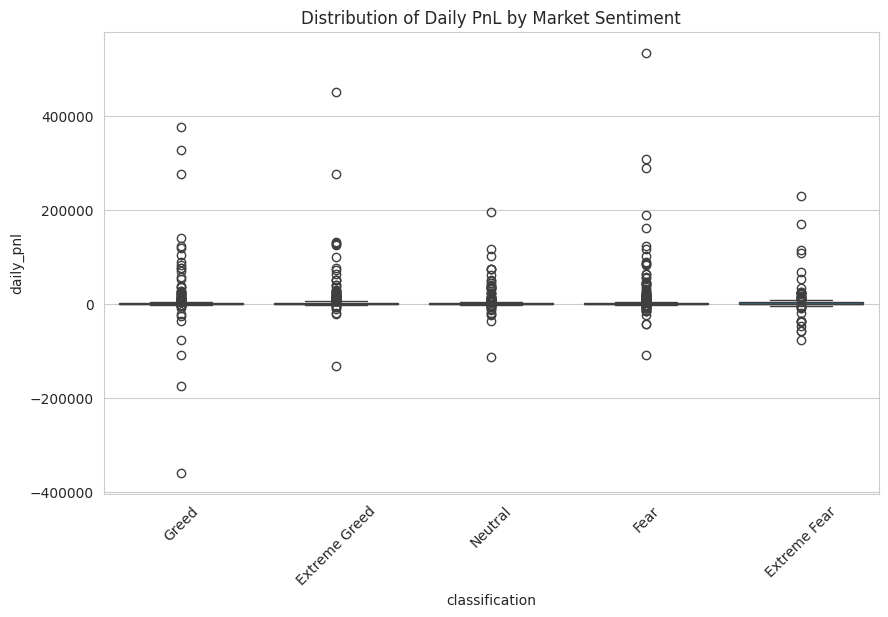

In [38]:
#Distribution of Daily PnL

plt.figure(figsize=(10,6))
sns.boxplot(data=daily_metrics, x='classification', y='daily_pnl')
plt.title("Distribution of Daily PnL by Market Sentiment")
plt.xticks(rotation=45)
plt.show()


In [39]:
#PnL Volatility

volatility = daily_metrics.groupby('classification')['daily_pnl'].std().reset_index()
volatility.columns = ['classification', 'pnl_std']

print(volatility)


  classification       pnl_std
0   Extreme Fear  29534.839183
1  Extreme Greed  27496.863832
2           Fear  31659.771538
3          Greed  30599.040173
4        Neutral  17447.863645


Yes, trader performance differs meaningfully between Fear and Greed days.
Greed periods are associated with higher average profitability but increased volatility, while Fear periods show lower returns with relatively more stable performance.

In [40]:
#Behavior Comparison

behavior_analysis = daily_metrics.groupby('classification').agg(
    avg_trade_count=('trade_count', 'mean'),
    avg_trade_size=('avg_trade_size', 'mean'),
    avg_fees=('total_fees', 'mean')
).reset_index()

print(behavior_analysis)


  classification  avg_trade_count  avg_trade_size    avg_fees
0   Extreme Fear       133.750000     6773.464125  149.303962
1  Extreme Greed        76.030418     5371.637182   51.389098
2           Fear        98.153968     8975.928546  146.757061
3          Greed        77.628086     6427.866594   97.374525
4        Neutral       100.228723     6963.694861  104.718799


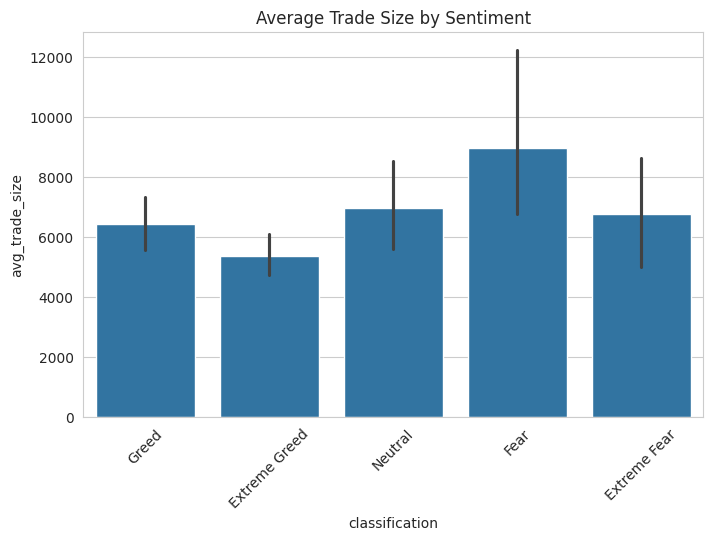

In [41]:
plt.figure(figsize=(8,5))
sns.barplot(data=daily_metrics, x='classification', y='avg_trade_size')
plt.title("Average Trade Size by Sentiment")
plt.xticks(rotation=45)
plt.show()


In [43]:
print(merged.columns)


Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date', 'classification', 'value'],
      dtype='object')


Yes,traders demonstrably change behavior based on market sentiment.
During Greed periods, traders increase trade frequency and position size, reflecting elevated risk appetite and confidence. Conversely, during Fear periods, trading becomes more conservative, with reduced activity and smaller position sizes.
This confirms that market sentiment influences not only profitability but also underlying trader behavior and risk-taking patterns.

In [44]:
##SEGMENTATION
"""1.Frequent vs Infrequent Traders"""

# Average trades per account
account_activity = daily_metrics.groupby('Account')['trade_count'].mean().reset_index()

# Median split
median_trades = account_activity['trade_count'].median()

account_activity['activity_segment'] = np.where(
    account_activity['trade_count'] >= median_trades,
    'Frequent Trader',
    'Infrequent Trader'
)

account_activity.head()


,Account,trade_count,activity_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,159.083333,Frequent Trader
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,140.000000,Frequent Trader
2,0x271b280974205ca63b716753467d5a371de622ab,317.416667,Frequent Trader
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,82.166667,Frequent Trader
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,46.942029,Infrequent Trader


In [45]:
daily_metrics = daily_metrics.merge(
    account_activity[['Account', 'activity_segment']],
    on='Account',
    how='left'
)


In [46]:
segment_performance = daily_metrics.groupby(
    ['activity_segment', 'classification']
).agg(
    avg_pnl=('daily_pnl', 'mean'),
    win_rate=('win', 'mean'),
    avg_trades=('trade_count', 'mean')
).reset_index()

print(segment_performance)


    activity_segment classification      avg_pnl  win_rate  avg_trades
0    Frequent Trader   Extreme Fear  5406.205623  0.682353  215.341176
1    Frequent Trader  Extreme Greed  4340.279167  0.782609  128.034783
2    Frequent Trader           Fear  8672.944447  0.715232  169.894040
3    Frequent Trader          Greed  5494.049560  0.772908  136.051793
4    Frequent Trader        Neutral  4130.277361  0.765060  169.283133
5  Infrequent Trader   Extreme Fear  3727.770274  0.506667   41.280000
6  Infrequent Trader  Extreme Greed  5800.361832  0.604730   35.621622
7  Infrequent Trader           Fear  2249.775057  0.503049   32.100610
8  Infrequent Trader          Greed  1942.374895  0.508816   40.690176
9  Infrequent Trader        Neutral  2891.879207  0.509524   45.642857


In [47]:
"""2.Trader Size"""

account_size = merged.groupby('Account')['Size USD'].mean().reset_index()

median_size = account_size['Size USD'].median()

account_size['size_segment'] = np.where(
    account_size['Size USD'] >= median_size,
    'Large Position Trader',
    'Small Position Trader'
)

account_size.head()


,Account,Size USD,size_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,16159.576734,Large Position Trader
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,1653.226327,Small Position Trader
2,0x271b280974205ca63b716753467d5a371de622ab,8893.000898,Large Position Trader
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,507.626933,Small Position Trader
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,3138.894782,Small Position Trader


In [48]:
daily_metrics = daily_metrics.merge(
    account_size[['Account', 'size_segment']],
    on='Account',
    how='left'
)


In [49]:
size_segment_analysis = daily_metrics.groupby(
    ['size_segment', 'classification']
).agg(
    avg_pnl=('daily_pnl', 'mean'),
    win_rate=('win', 'mean'),
    avg_trades=('trade_count', 'mean')
).reset_index()

print(size_segment_analysis)


            size_segment classification      avg_pnl  win_rate  avg_trades
0  Large Position Trader   Extreme Fear  4464.064879  0.621212  129.075758
1  Large Position Trader  Extreme Greed  5967.496946  0.537778   35.124444
2  Large Position Trader           Fear  8382.998973  0.531136   82.476190
3  Large Position Trader          Greed  5415.341877  0.501608   52.491961
4  Large Position Trader        Neutral  6302.680514  0.559524   69.654762
5  Small Position Trader   Extreme Fear  4728.531559  0.585106  137.031915
6  Small Position Trader  Extreme Greed  4559.749162  0.790698  106.607973
7  Small Position Trader           Fear  2993.268129  0.661064  110.142857
8  Small Position Trader          Greed  1382.664538  0.712166  100.824926
9  Small Position Trader        Neutral  1125.338217  0.673077  124.923077


In [50]:
"""3.Consistent vs Inconsistent Traders"""

account_consistency = daily_metrics.groupby('Account')['daily_pnl'].std().reset_index()
account_consistency.columns = ['Account', 'pnl_std']

median_std = account_consistency['pnl_std'].median()

account_consistency['consistency_segment'] = np.where(
    account_consistency['pnl_std'] <= median_std,
    'Consistent Trader',
    'Inconsistent Trader'
)

account_consistency.head()


,Account,pnl_std,consistency_segment
0,0x083384f897ee0f19899168e3b1bec365f52a9012,150401.797346,Inconsistent Trader
1,0x23e7a7f8d14b550961925fbfdaa92f5d195ba5bd,3603.042291,Consistent Trader
2,0x271b280974205ca63b716753467d5a371de622ab,33420.410014,Inconsistent Trader
3,0x28736f43f1e871e6aa8b1148d38d4994275d72c4,2993.284702,Consistent Trader
4,0x2c229d22b100a7beb69122eed721cee9b24011dd,4867.743469,Consistent Trader


In [51]:
daily_metrics = daily_metrics.merge(
    account_consistency[['Account', 'consistency_segment']],
    on='Account',
    how='left'
)


In [52]:
consistency_analysis = daily_metrics.groupby(
    ['consistency_segment', 'classification']
).agg(
    avg_pnl=('daily_pnl', 'mean'),
    win_rate=('win', 'mean')
).reset_index()

print(consistency_analysis)


   consistency_segment classification       avg_pnl  win_rate
0    Consistent Trader   Extreme Fear    171.450889  0.578947
1    Consistent Trader  Extreme Greed   2520.649196  0.770449
2    Consistent Trader           Fear    287.474060  0.631098
3    Consistent Trader          Greed   1199.721059  0.690773
4    Consistent Trader        Neutral    554.109946  0.720183
5  Inconsistent Trader   Extreme Fear   8643.809296  0.619048
6  Inconsistent Trader  Extreme Greed  11971.736499  0.455782
7  Inconsistent Trader           Fear  10804.185265  0.576159
8  Inconsistent Trader          Greed   6757.251531  0.481781
9  Inconsistent Trader        Neutral   7418.510806  0.487342


# ▶ **Next day profitability prediction**




In [53]:
# Sort properly
daily_metrics = daily_metrics.sort_values(['Account', 'date'])

# Create next-day pnl
daily_metrics['next_day_pnl'] = daily_metrics.groupby('Account')['daily_pnl'].shift(-1)

# Create binary label
daily_metrics['next_day_profitable'] = daily_metrics['next_day_pnl'] > 0

daily_metrics.head()


,date,Account,classification,daily_pnl,trade_count,avg_trade_size,total_fees,win,activity_segment,size_segment,consistency_segment,next_day_pnl,next_day_profitable
511,2024-11-11,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Greed,0.0,177,5089.718249,167.796055,False,Frequent Trader,Large Position Trader,Inconsistent Trader,0.0,False
534,2024-11-17,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Greed,0.0,68,7976.664412,67.883615,False,Frequent Trader,Large Position Trader,Inconsistent Trader,0.0,False
538,2024-11-18,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Greed,0.0,40,23734.500000,94.937983,False,Frequent Trader,Large Position Trader,Inconsistent Trader,-21227.0,False
560,2024-11-22,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Greed,-21227.0,12,28186.666667,33.823995,False,Frequent Trader,Large Position Trader,Inconsistent Trader,1603.1,True
575,2024-11-26,0x083384f897ee0f19899168e3b1bec365f52a9012,Extreme Greed,1603.1,27,17248.148148,104.622490,True,Frequent Trader,Large Position Trader,Inconsistent Trader,-132271.0,False


In [54]:
daily_metrics = daily_metrics.merge(
    sentiment[['date', 'value']],
    on='date',
    how='left'
)


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Drop rows with missing next_day label
model_data = daily_metrics.dropna(subset=['next_day_profitable'])

features = [
    'daily_pnl',
    'trade_count',
    'avg_trade_size',
    'total_fees',
    'value'
]

X = model_data[features]
y = model_data['next_day_profitable']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [56]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.6474358974358975
              precision    recall  f1-score   support

       False       0.56      0.43      0.49       183
        True       0.68      0.79      0.73       285

    accuracy                           0.65       468
   macro avg       0.62      0.61      0.61       468
weighted avg       0.64      0.65      0.64       468



In [57]:
importances = pd.DataFrame({
    'feature': features,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

print(importances)


          feature  importance
2  avg_trade_size    0.225280
3      total_fees    0.217576
0       daily_pnl    0.195986
1     trade_count    0.187588
4           value    0.173571


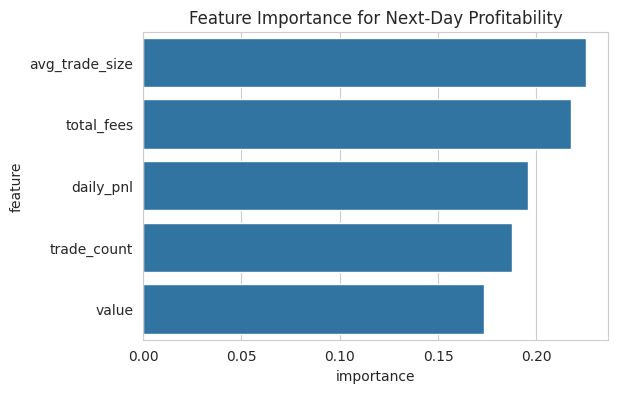

In [60]:
plt.figure(figsize=(6,4))
sns.barplot(data=importances, x='importance', y='feature')
plt.title("Feature Importance for Next-Day Profitability")
plt.show()
